**Click on File and save a copy in Drive.**

### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [1]:
! pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

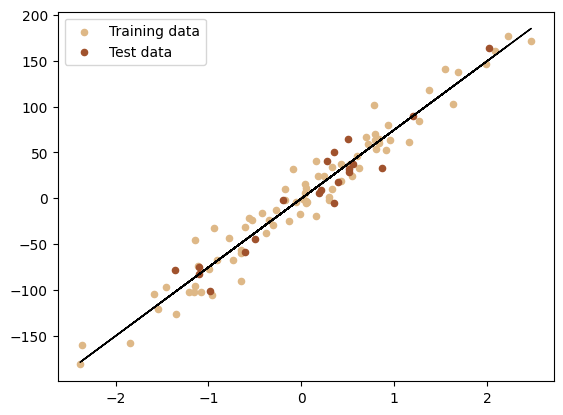

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Your code here
fig = plt.figure()
ax1 = fig.add_subplot(111)

# plotting the points
ax1.scatter(X_train, y_train, s=20, c='burlywood', label='Training data')
ax1.scatter(X_test,y_test, s=20, c='sienna', label='Test data')
plt.legend(loc='upper left')

# plotting the regression line

regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)
plt.plot(X, y_pred, color = "black",linewidth = '1' )
# having a look at what our outputs should look like....
plt.show()


In [4]:
#predicted value
regressor.predict(X)

array([-101.40208393,   25.97017637,   71.10676702,    2.26006331,
          3.16512494,    3.20984223,   53.77037535,   59.67101512,
        -86.14099575,   13.01172316,  -48.96709456,  -83.81907463,
       -119.170089  ,   -7.02532131,  185.14699719,  -55.30331742,
        115.48844234,  -10.22630936,   22.08128793,  -71.19700752,
        -23.13430582,  -28.4906244 ,  -87.11645691,   44.42118821,
       -178.75707078,  -45.96802494,   40.21562986,  151.11376254,
          3.02494832,   38.77663323,   21.83368268, -116.04924427,
        126.38215538,   15.25244304,  -31.77695372,   64.82308112,
        -86.41660579,  -13.56129187,  -72.50146521,   13.70377077,
         89.63812371,  148.6917578 , -102.41408325,   -4.52042717,
         86.80451077, -109.50045071,    0.99832613,  -58.78586923,
          2.38141327,  -26.36678055,  -49.23079055,   11.44252719,
        -91.02288313,  -48.96243113,   68.12009412, -138.37544559,
         37.03095746,   94.86968385,   51.54162038,   41.24476

In [5]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    
    mse = np.sum((y_true-y_pred)**2) / len(y_true)
    return mse      

def r2_score(y_true, y_pred):
    r = 1 - np.sum((y_true - y_pred)**2) / np.sum(y_true - np.mean(y_true))
    return r
    # return the r2 score
       
# for this default pridicted value         
y_pred = regressor.predict(X)
# mse should be...
mse =  mean_squared_error(y,y_pred)
print("MSE:", mse)

# accuracy should be...
accu = r2_score(y,y_pred)
print("Accuracy:", accu)

MSE: 290.1597138208692
Accuracy: 1.1343430373624966e+17


You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (xw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x(y_i -(m  x +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [6]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    


    def __init__(self, learning_rate=0.001, n_iters=1000):
      # Initializing weight, bias, learning rate and iterations
      self.W = 1
      self.b = 0.01
      self.n_iters = n_iters
      self.l = learning_rate
       
    

    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
        # Gradient Descent code goes here
        n = float(len(X))
     
        costs = []
        weights = []
        previous_cost = None
        stopping_threshold = 1e-6
       # Estimation of optimal parameters
        for i in range(self.n_iters):
         
          # Making predictions
          y_predicted = (self.W * X) + self.b
         
          # Calculating the current cost
          current_cost =  np.sum((y_train-y_predicted)**2) / len(y_train)
 
          # If the change in cost is less than or equal to
          # stopping_threshold we stop the gradient descent
          if previous_cost and abs(previous_cost-current_cost) <= stopping_threshold:
            break
         
          previous_cost = current_cost
 
          costs.append(current_cost)
          weights.append(self.W)
          weight_derivative = -(2/n) * np.sum(X * (y_train-y_predicted))
          bias_derivative = -(2/n) * np.sum(y_train-y_predicted)
         
          # Updating weights and bias
          self.W = self.W - (self.l * weight_derivative)
          self.b = self.b - (self.l * bias_derivative)
        
          # Visualizing the weights and cost at for all iterations
       
        plt.plot(weights, costs)
        plt.scatter(weights, costs, marker='o', color='red')
        plt.title("Bias vs Weights")
        plt.ylabel("Bias")
        plt.xlabel("Weight")
        plt.show()                   



        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X=[],y=[]):
        Y_pred = np.array([])
       
        
        for x in X:
            Y_pred = np.append(Y_pred, self.b + (self.W * x))
 
        return y - Y_pred






### Initializing, Training & Predictions

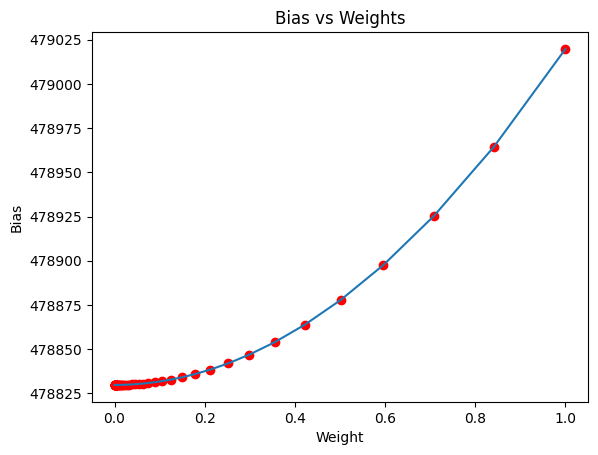

In [7]:
# Now, we make an object of our custom class.
reg = LinearRegression() 
reg.__init__
# Call the fit method on the object to train (pass appropriate part of dataset)
reg.fit(X_train,y_train)
#also plotting for bias vs wieghts



In [8]:
reg.predict(X_train,y_train)

# Now, let's see our what our model predicts
# pass appropriate part of dataset


array([  23.45279017,  -20.26847769,   36.16354396,  116.8011204 ,
          8.36446614,  175.73276051,  -22.61357093,  -18.37166326,
        101.28777968,   14.5474647 ,   -6.92486072,   58.68911068,
        -60.61222002,   23.10200939,   83.3255776 ,    8.56775044,
        -46.81217732,   52.61822836,   50.9742846 ,  -25.23111078,
        -39.06673512,   -3.30774847,   68.45416605,   63.46724071,
       -103.09348744,   57.50816644,   59.61651812,  -96.53625134,
        144.90747594,  140.27221711,  -98.39786975,  -30.61034107,
        -32.96924529, -159.47980746,   17.9747459 , -122.08088196,
        -13.65963745,   -3.94723822, -103.56248208,  137.00389141,
       -102.98520107,   30.61236182,  -68.47680566,  -25.56287105,
          9.57835084,   -2.35521071,   36.24243409,  169.957921  ,
          7.18316825, -105.35781312,  -33.79104528,   61.95921546,
          4.85940091, -127.44439511,  -74.61869234, -161.70401707,
        159.80048233,  -17.40216042,   -2.97288564,   33.24573

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [9]:
def mean_squared_error(y_true, y_pred):
      # Calculating the loss or cost
    mse = np.sum((y_true-y_pred)**2) / len(y_true)
    return mse


       

def r2_score(y_true, y_pred):
    r = 1 - np.sum((y_true - y_pred)**2) / np.sum(y_true - np.mean(y_true))
    return r
    # return the r2 score
       
          
y_pred = reg.predict(X,y)
mse =  mean_squared_error(y,y_pred)
print("MSE:", mse)

accu = r2_score(y,y_pred)
print("Accuracy:", accu)

MSE: 1.4287877670258278
Accuracy: 558566671455646.9


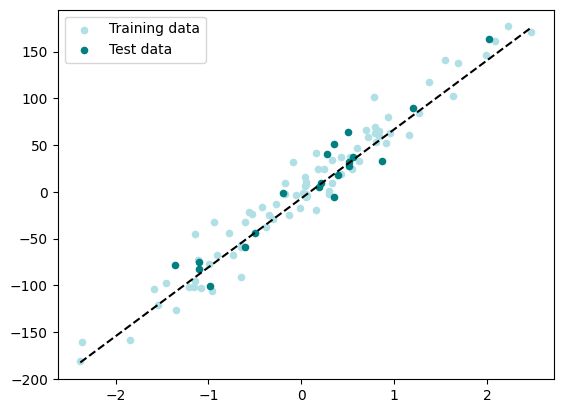

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X_train, y_train, s=20, c='powderblue', label='Training data')
ax1.scatter(X_test,y_test, s=20, c='teal', label='Test data')
plt.legend(loc='upper left')

y_pred = reg.predict(X,y)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='black',markerfacecolor='red',
             markersize=10,linestyle='dashed')

plt.show()

[Please click on this link to access subjective questions](https://docs.google.com/document/d/1ty9m1vUoPNh_WU8qATznTKukukkSwOlnLJazhBFmWO4/edit?usp=sharing)